In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
import conceptnet_lite

conceptnet_lite.connect("data/conceptnet.db")
from conceptnet_lite import Label, edges_for

In [3]:
import mutual_info as mi
#from mutual_info import *
#len(mi.nearest_distances(texto1.T,k=3))


In [4]:
def encontrar_relaciones(relaciones):
    borrar=set()
    borrar_i=set()
    for r in relaciones:
        index=r[0]
        c=r[1]
        wt=str(index).split("{")[1].split(",")[0]
        wh=str(c).split("{")[1].split(",")[0]    
        try:
            for e in edges_for(Label.get(text=wh, language='en').concepts, same_language=True):
                if "synonym"==e.relation.name:
                    if wh== e.start.text:
                        if e.end.text==wt:
                            borrar.add(c)
                            borrar_i.add(index)
                            break
                    else:
                        if e.start.text==wt:
                            borrar.add(c)
                            borrar_i.add(index)
                            break
                elif "is_a" ==e.relation.name:
                    if wh== e.start.text:
                        if e.end.text==wt:
                            print(wh," is_a ",wt)
                            borrar.add(c)
                            borrar_i.add(index)
                            break
                    else: ##quitar y la busqueda de relacioens
                        if wh== e.end.text:
                            if e.start.text==wt:
                                print(wt," is_a ",wh)
                                borrar.add(c)
                                borrar_i.add(index)
                                break
                # elif "derived_from" == e.relation.name:
                #     if wh== e.start.text:
                #         if e.end.text==wt:
                #             print(wh," derivado_from ",wt)
                #             borrar.add(c)
                #             borrar_i.add(index)
                #             break
                elif "used_for" == e.relation.name:
                    if wh== e.start.text:
                        if e.end.text==wt:
                            print(wh," used_for ",wt)
                            borrar.add(c)
                            borrar_i.add(index)
                            break
        except:
            a=0
    return list(borrar),list(borrar_i)

In [5]:
def encontrar_relaciones_contrarias(relaciones):
    antonyms=[]
    borrar=[]
    borrar_i=[]
    for r in relaciones:
        index=r[0]
        c=r[1]
        wt=str(index).split("{")[1].split(",")[0]
        wh=str(c).split("{")[1].split(",")[0]
        try:
            for e in edges_for(Label.get(text=wh, language='en').concepts, same_language=True):
                if "antonym" ==e.relation.name:
                    if wt== e.start.text:
                        if e.end.text==wh:
                            print(wt," antonym ",wh)
                            #borrar.append(c)
                            #borrar_i.append(index)
                            antonyms.append(wt)
                            break
                        else:
                            print(wh," antonym ",wt)
                            #borrar.append(c)
                            #borrar_i.append(index)
                            antonyms.append(wt)
                            break
                elif "distinct_from" ==e.relation.name:
                    if wh== e.start.text:
                        if e.end.text==wt:
                            print(wh," distinct from ",wt)
                            #borrar.append(c)
                            #borrar_i.append(index)
                            antonyms.append(wt)
                            break
                    else:
                        if e.start.text==wt:
                            print(wt," antonym ",wh)
                            #borrar.append(c)
                            #borrar_i.append(index)
                            antonyms.append(wt)
                            break
        except:
            a=0
    return borrar,borrar_i,antonyms

In [6]:
def encontrar_relaciones_cercanas(indexes,columnas):
    borrar=[]
    borrar_i=[]
    related=[]
    for index in indexes:
        for c in columnas:
            wt=str(index).split("{")[1].split(",")[0]
            wh=str(c).split("{")[1].split(",")[0]
            try:
                for e in edges_for(Label.get(text=wh, language='en').concepts, same_language=True):
                    if "related_to" ==e.relation.name:
                        if wt== e.start.text:
                            if e.end.text==wh:
                                print(wt," related_to ",wh)
                                #borrar.append(c)
                                #borrar_i.append(index)
                                related.append(wt)
                                break
                            else:
                                print(wh," related_to ",wt)
                                #borrar.append(c)
                                #borrar_i.append(index)
                                related.append(wt)
                                break
                    elif "similar_to" ==e.relation.name:
                        if wh== e.start.text:
                            if e.end.text==wt:
                                print(wh," similar_to ",wt)
                                #borrar.append(c)
                                #borrar_i.append(index)
                                related.append(wt)
                                break
                        else:
                            if e.start.text==wt:
                                print(wt," similar_to ",wh)
                                #borrar.append(c)
                                #borrar_i.append(index)
                                related.append(wt)
                                break
            except:
                a=0
    return borrar,borrar_i,related

In [7]:
dfp=pd.read_pickle("data/prueba2_T.pickle")
dfp

,Main index,Text,Hipotesis,R_Text,R_Hip,M_Align,Prediction,Gold_label,Input1,Input2,Model1,Model2
0,0,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, we...","[NULL{null,PROPN}, a{a,DET}, person{person,NOU...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[54.419086, 0.26434264, 19.101225, 1.2564747,...","[0.03256245, 0.9674213, 1.6298849e-05]","[1.0, 0.0, 0.0]","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404..."
1,1,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, dr...","[NULL{null,PROPN}, a{a,DET}, guy{guy,NOUN}, in...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[54.419086, 0.26434264, 15.958708, 1.2564747,...","[0.032293927, 0.9676897, 1.637127e-05]","[1.0, 0.0, 0.0]","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404..."
2,2,"[NULL{null,PROPN}, a{a,DET}, young{young,ADJ},...","[NULL{null,PROPN}, a{a,DET}, boy{boy,NOUN}, sl...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[54.419086, 0.26434264, 13.145995, 53.678085,...","[0.86936, 0.016950097, 0.113689914]","[0.0, 0.0, 1.0]","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404..."
3,3,"[NULL{null,NOUN}, an{an,DET}, asian{asian,ADJ}...","[NULL{null,PROPN}, nobody{nobody,NOUN}, is{be,...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[54.419086, 39.413757, 4.3888206, 17.930946, ...","[0.56929874, 0.4305042, 0.00019709245]","[0.0, 0.0, 1.0]","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404..."
4,4,"[NULL{null,PROPN}, a{a,DET}, child{child,NOUN}...","[NULL{null,PROPN}, the{the,DET}, child{child,N...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[54.419086, 0.0, 13.88712, 4.3888206, 1.63502...","[0.012144173, 0.9878521, 3.820453e-06]","[0.0, 1.0, 0.0]","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404..."
...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,"[NULL{null,PROPN}, a{a,DET}, group{group,NOUN}...","[NULL{null,PROPN}, a{a,DET}, bunch{bunch,NOUN}...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[54.419086, 0.26434264, 3.9083166, 0.06153027...","[0.0071587614, 0.99284124, 1.5131656e-08]","[1.0, 0.0, 0.0]","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404..."
96,96,"[NULL{null,PROPN}, a{a,DET}, woman{woman,NOUN}...","[NULL{null,ADJ}, woman{woman,NOUN}, holds{hold...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[54.419086, 13.22332, 7.2733583, 11.074403, 0...","[0.019462422, 0.98053336, 4.2487504e-06]","[1.0, 0.0, 0.0]","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404...","[[0.46309, 0.43844, -0.47275, 0.0077819, 0.404..."
97,97,"[NULL{null,PROPN}, a{a,DET}, skateboarding{ska...","[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, pa...","[[0.46309, 0.438

In [8]:
def obtener_distancia(num,dfp):
    texto_2_t=dfp.at[num,"Text"]
    hipotesis_2_t=dfp.at[num,"Hipotesis"]
    texto_2=dfp.at[num,"R_Text"]
    hipotesis_2=dfp.at[num,"R_Hip"]
    if len(texto_2_t) > 41 and len(hipotesis_2_t) > 41:
        max_t=41
        max_h=41
    elif len(texto_2_t) > 41:
        max_t=41
        max_h=len(hipotesis_2_t)
    elif len(hipotesis_2_t) > 41:
        max_h=41
        max_t=len(texto_2_t)
    else:
        max_t=len(texto_2_t)
        max_h=len(hipotesis_2_t)
    lista_l=[]
    for i in range(max_t):
        lista=[]
        for j in range(max_h):
            lista.append(np.linalg.norm(texto_2[i] - hipotesis_2[j]))#*wasserstein_distance(texto_2[i],hipotesis_2[j]))
        lista_l.append(lista)
    meartrh=pd.DataFrame(lista_l[:],index=texto_2_t[:max_t],columns=hipotesis_2_t[:max_h])
    col=meartrh.columns
    borrar=[]
    for c in col:
        if "{null" in str(c) or "{be,VERB" in str(c) or ("NOUN" not in str(c) and "VERB" not in str(c) and "ADJ" not in str(c) and "ADV" not in str(c)):
            borrar.append(c)        
    borrar_i=[]
    indexes=meartrh.index
    for index in indexes:
        if "{null" in str(index) or "{be,VERB" in str(index) or ("NOUN" not in str(index) and "VERB" not in str(index) and "ADJ" not in str(index) and "ADV" not in str(index)):
            borrar_i.append(index)        
    meartrh=meartrh.drop(borrar,axis=1)
    meartrh=meartrh.drop(borrar_i,axis=0)
    return meartrh.min().sum()

In [9]:
obtener_distancia(1,dfp)

13.863624334335327

In [10]:
num=4

In [11]:
texto_2_t=dfp.at[num,"Text"]
hipotesis_2_t=dfp.at[num,"Hipotesis"]

In [12]:
texto_2=dfp.at[num,"R_Text"][:len(texto_2_t)]
hipotesis_2=dfp.at[num,"R_Hip"][:len(hipotesis_2_t)]

In [13]:
from scipy.stats import wasserstein_distance
lista_l=[]
lista_muinfor=[]
for i in range(len(texto_2)):
    lista=[]
    lista_mu=[]
    for j in range(len(hipotesis_2)):
        #lista.append()
        lista.append(wasserstein_distance(texto_2[i],hipotesis_2[j]))
        lista_mu.append(mi.mutual_information_2d(np.array(texto_2[i]),np.array(hipotesis_2[j])))
    lista_l.append(lista)
    lista_muinfor.append(lista_mu)
print(lista_l)

[[0.0, 0.19008815211666233, 0.08020218823881195, 0.1775682177426642, 0.16140678274503445, 0.08671844121922426, 0.15351576059979072, 0.19008815211666233, 0.05986579852498835, 0.15115383563408002], [0.14834371000567137, 0.043891933305079275, 0.0830695415090304, 0.03418254807872775, 0.024505374192376667, 0.07508806559373624, 0.03322409135095467, 0.043891933305079275, 0.09137285773671464, 0.02293595313288581], [0.08020218823881195, 0.12036977648691691, 0.0, 0.10856170185696101, 0.09265287483518479, 0.0402823770069517, 0.08593330307165159, 0.12036977648691691, 0.03593013265315671, 0.0909132596850395], [0.15720896474939455, 0.04066822837538288, 0.08736436379840597, 0.03234842489560834, 0.028707856196172894, 0.08221165459603068, 0.029253624348590777, 0.04066822837538288, 0.10056427274743322, 0.0317498613311909], [0.14834371000567137, 0.043891933305079275, 0.0830695415090304, 0.03418254807872775, 0.024505374192376667, 0.07508806559373624, 0.03322409135095467, 0.043891933305079275, 0.0913728577

In [14]:
meartrh=pd.DataFrame(lista_l[:],index=texto_2_t,columns=hipotesis_2_t)
meartrh

,"NULL{null,PROPN}","the{the,DET}","child{child,NOUN}","is{be,VERB}","getting{get,VERB}","wet{wet,NOUN}","from{from,ADP}","the{the,DET}","fountain{fountain,NOUN}",".{.,PUNCT}"
"NULL{null,PROPN}",0.000000,0.190088,0.080202,0.177568,0.161407,0.086718,0.153516,0.190088,0.059866,0.151154
"a{a,DET}",0.148344,0.043892,0.083070,0.034183,0.024505,0.075088,0.033224,0.043892,0.091373,0.022936
"child{child,NOUN}",0.080202,0.120370,0.000000,0.108562,0.092653,0.040282,0.085933,0.120370,0.035930,0.090913
"in{in,ADP}",0.157209,0.040668,0.087364,0.032348,0.028708,0.082212,0.029254,0.040668,0.100564,0.031750
"a{a,DET}",0.148344,0.043892,0.083070,0.034183,0.024505,0.075088,0.033224,0.043892,0.091373,0.022936
"maroon{maroon,ADJ}",0.074602,0.123027,0.034633,0.111154,0.090948,0.032780,0.085188,0.123027,0.024583,0.086076
"shirt{shirt,NOUN}",0.081864,0.125727,0.032901,0.112817,0.092457,0.025922,0.090336,0.125727,0.033148,0.091426
"playing{play,VERB}",0.105730,0.093860,0.049204,0.083474,0.059995,0.046515,0.056199,0.093860,0.050459,0.060019
"next{next,ADV}",0.165917,0.032421,0.097333,0.035703,0.015734,0.092878,0.025525,0.032421,0.106745,0.025714
"to{to,ADP}",0.181752,0.026487,0.116125,0.036188,0.036366,0.114929,0.033965,0.026487,0.124687,0.035432


In [15]:
col=meartrh.columns
borrar=[]
for c in col:
    if "{be,VERB" in str(c) or ("NOUN" not in str(c) and "VERB" not in str(c) and "ADJ" not in str(c) and "ADV" not in str(c)):
        borrar.append(c)        
borrar

['NULL{null,PROPN}',
 'the{the,DET}',
 'is{be,VERB}',
 'from{from,ADP}',
 'the{the,DET}',
 '.{.,PUNCT}']

In [16]:
borrar_i=[]
for index,strings in meartrh.iterrows():
    if "{be,VERB" in str(index) or ("NOUN" not in str(index) and "VERB" not in str(index) and "ADJ" not in str(index) and "ADV" not in str(index)):
        borrar_i.append(index)        
borrar_i

['NULL{null,PROPN}',
 'a{a,DET}',
 'in{in,ADP}',
 'a{a,DET}',
 'to{to,ADP}',
 'a{a,DET}',
 '.{.,PUNCT}']

In [17]:
meartrh=meartrh.drop(borrar,axis=1)
meartrh=meartrh.drop(borrar_i,axis=0)
#meartrh=meartrh.drop("is{be,VERB}",axis=0)
meartrh

,"child{child,NOUN}","getting{get,VERB}","wet{wet,NOUN}","fountain{fountain,NOUN}"
"child{child,NOUN}",0.000000,0.092653,0.040282,0.035930
"maroon{maroon,ADJ}",0.034633,0.090948,0.032780,0.024583
"shirt{shirt,NOUN}",0.032901,0.092457,0.025922,0.033148
"playing{play,VERB}",0.049204,0.059995,0.046515,0.050459
"next{next,ADV}",0.097333,0.015734,0.092878,0.106745
"fountain{fountain,NOUN}",0.035930,0.102449,0.039280,0.000000


In [18]:
meartrh.idxmax()

child{child,NOUN}                   next{next,ADV}
getting{get,VERB}          fountain{fountain,NOUN}
wet{wet,NOUN}                       next{next,ADV}
fountain{fountain,NOUN}             next{next,ADV}
dtype: object

In [19]:
meartrh.min().sum()

0.04165652627775368

In [20]:
meartrh.sum().sum()

1.2327605265489543

# Para normalizar vectores

In [21]:
#norms = np.linalg.norm(texto_2, axis=-1, keepdims=True)
#norms = np.where(norms == 0, 1, norms)
#print(texto_2 / norms)

In [22]:
#ma_2=np.dot(texto_2,texto_2.T)
#ma_2

In [23]:
#madt=pd.DataFrame(ma_2)
#madt

In [24]:
#madt.min()

# Lectura de matriz de alineamiento

In [25]:
df = pd.read_pickle("data/prueba100.pickle")
df

,Main index,Text,Hipotesis,R_Text,R_Hip,M_Align,Prediction,Gold_label
0,0,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, we...","[NULL{null,PROPN}, a{a,DET}, person{person,NOU...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[2.760008, 0.060492776, 0.7027438, 0.20296031...","[0.4928643, 0.50155383, 0.0055818837]","[1.0, 0.0, 0.0]"
1,1,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, dr...","[NULL{null,PROPN}, a{a,DET}, guy{guy,NOUN}, in...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[2.760008, 0.060492776, 0.64837056, 0.2029603...","[0.4695498, 0.3973312, 0.13311893]","[1.0, 0.0, 0.0]"
2,2,"[NULL{null,PROPN}, a{a,DET}, young{young,ADJ},...","[NULL{null,PROPN}, a{a,DET}, boy{boy,NOUN}, sl...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[2.760008, 0.060492776, 0.4078711, 2.2245083,...","[1.4341879e-06, 8.787866e-05, 0.9999107]","[0.0, 0.0, 1.0]"
3,3,"[NULL{null,NOUN}, an{an,DET}, asian{asian,ADJ}...","[NULL{null,PROPN}, nobody{nobody,NOUN}, is{be,...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[2.760008, 1.9305927, 0.10360007, 0.8346571, ...","[0.033964496, 0.008023773, 0.9580117]","[0.0, 0.0, 1.0]"
4,4,"[NULL{null,PROPN}, a{a,DET}, child{child,NOUN}...","[NULL{null,PROPN}, the{the,DET}, child{child,N...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[2.760008, 0.033035405, 0.5160244, 0.10360007...","[0.0027733932, 0.9895504, 0.0076761814]","[0.0, 1.0, 0.0]"
...,...,...,...,...,...,...,...,...
95,95,"[NULL{null,PROPN}, a{a,DET}, group{group,NOUN}...","[NULL{null,PROPN}, a{a,DET}, bunch{bunch,NOUN}...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[2.760008, 0.060492776, 0.41359743, 0.0717519...","[0.8000752, 0.17865694, 0.021267932]","[1.0, 0.0, 0.0]"
96,96,"[NULL{null,PROPN}, a{a,DET}, woman{woman,NOUN}...","[NULL{null,ADJ}, woman{woman,NOUN}, holds{hold...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[2.760008, 0.475788, 0.8695118, 0.72379255, 0...","[0.7528739, 0.18234292, 0.06478321]","[1.0, 0.0, 0.0]"
97,97,"[NULL{null,PROPN}, a{a,DET}, skateboarding{ska...","[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, pa...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[2.760008, 0.060492776, 0.43997452, 1.9583746...","[7.513892e-05, 0.0013085654, 0.99861634]","[0.0, 0.0, 1.0]"
98,98,"[NULL{null,ADJ}, four{four,NUM}, children{chil...","[NULL{null,PROPN}, the{the,DET}, children{chil...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[0.058692623, 0.05556845, -0.059916947, 0.000...","[[2.760008, 0.033035405, 0.44769567, 0.0726737...","[0.034316223, 0.83774996, 0.12793382]","[0.0, 0.0, 1.0]"


In [26]:
indice=4

In [27]:
t=pd.DataFrame(df.at[indice,"Text"])
h=pd.DataFrame(df.at[indice,"Hipotesis"])
print(len(t))
print(len(h))

13
10


In [28]:
texto1=pd.DataFrame(df.at[indice,"R_Text"])
hipotesis1=pd.DataFrame(df.at[indice,"R_Hip"])

In [29]:
#t

In [30]:
#h

# Comparar con concatenación y suma las tuplas alineadas en intrasentence

In [31]:
texto1=df.at[indice,"R_Text"]
hipotesis1=df.at[indice,"R_Hip"]

In [32]:
#t

In [33]:
texto1[2].shape

(300,)

In [34]:
#    FOUNTAIN - CHILD
fontain=np.mean((texto1[11],texto1[2]),axis=0)
len(fontain)

300

In [35]:
#  FOUNTAIN  - WET
wetf=np.mean((hipotesis1[8],hipotesis1[5]),axis=0)
len(wetf)

300

In [36]:
#POR QUE EXCEDE EL VALOR DE 1
np.dot(fontain,wetf)

0.40066826

In [37]:
#   A  - CHILD
a_child=np.concatenate((texto1[1],texto1[2]))
#shirtlees_man=(texto1[1]+texto1[2])/2
len(a_child)

600

In [38]:
# playing -to
playing_to=np.concatenate((texto1[7],texto1[9]))
#shirtlees_man=(texto1[1]+texto1[2])/2
len(playing_to)

600

In [39]:
#   CHILD - the
child_the=np.concatenate((hipotesis1[2],hipotesis1[7]))
len(child_the)

600

In [40]:
getting_wet=np.concatenate((hipotesis1[4],hipotesis1[5]))
#not_wearing=(hipotesis1[4]+hipotesis1[5])/2
len(getting_wet)

600

In [41]:
np.dot(a_child,child_the)

0.7518902

In [42]:
np.dot(playing_to,getting_wet)

0.7447931

In [43]:
np.dot(playing_to,child_the)

0.8623389

In [44]:
np.dot(getting_wet,fontain)

ValueError: shapes (600,) and (300,) not aligned: 600 (dim 0) != 300 (dim 0)

In [ ]:
np.dot(getting_wet,wetf)

ValueError: shapes (600,) and (300,) not aligned: 600 (dim 0) != 300 (dim 0)

## Comparación intrasentence

In [45]:
maTexto=pd.DataFrame(np.dot(texto1[1:len(t)],texto1[1:len(t)].T),index=t[1:],columns=t[1:])
maTexto

,"(a{a,DET},)","(child{child,NOUN},)","(in{in,ADP},)","(a{a,DET},)","(maroon{maroon,ADJ},)","(shirt{shirt,NOUN},)","(playing{play,VERB},)","(next{next,ADV},)","(to{to,ADP},)","(a{a,DET},)","(fountain{fountain,NOUN},)","(.{.,PUNCT},)"
"(a{a,DET},)",1.000000,0.395472,0.454527,1.000000,0.114632,0.266668,0.327973,0.495689,0.505892,1.000000,0.245613,0.291600
"(child{child,NOUN},)",0.395472,1.000000,0.332690,0.395472,0.090822,0.214158,0.274601,0.353080,0.401760,0.395472,0.143708,0.261569
"(in{in,ADP},)",0.454527,0.332690,1.000000,0.454527,0.050158,0.171070,0.325592,0.437826,0.471923,0.454527,0.194855,0.300469
"(a{a,DET},)",1.000000,0.395472,0.454527,1.000000,0.114632,0.266668,0.327973,0.495689,0.505892,1.000000,0.245613,0.291600
"(maroon{maroon,ADJ},)",0.114632,0.090822,0.050158,0.114632,1.000001,0.454116,0.048698,0.068707,0.014956,0.114632,0.135726,0.090673
"(shirt{shirt,NOUN},)",0.266668,0.214158,0.171070,0.266668,0.454116,1.000000,0.229041,0.260263,0.191875,0.266668,0.142237,0.218576
"(playing{play,VERB},)",0.327973,0.274601,0.325592,0.327973,0.048698,0.229041,1.000000,0.350165,0.259833,0.327973,0.146186,0.249423
"(next{next,ADV},)",0.495689,0.353080,0.437826,0.495689,0.068707,0.260263,0.350165,1.000001,0.509918,0.495689,0.179694,0.348170
"(to{to,ADP},)",0.505892,0.401760,0.471923,0.505892,0.014956,0.191875,0.259833,0.509918,1.000000,0.505892,0.157662,0.358275
"(a{a,DET},)",1.000000,0.395472,0.454527,1.000000,0.114632,0.266668,0.327973,0.495689,0.505892,1.000000,0.245613,0.291600


In [46]:
maHipotesis=pd.DataFrame(np.dot(hipotesis1[1:len(h)],hipotesis1[1:len(h)].T),index=h[1:],columns=h[1:])
maHipotesis

,"(the{the,DET},)","(child{child,NOUN},)","(is{be,VERB},)","(getting{get,VERB},)","(wet{wet,NOUN},)","(from{from,ADP},)","(the{the,DET},)","(fountain{fountain,NOUN},)","(.{.,PUNCT},)"
"(the{the,DET},)",1.000000,0.356418,0.553611,0.427420,0.277771,0.489423,1.000000,0.258244,0.311352
"(child{child,NOUN},)",0.356418,1.000000,0.386440,0.358259,0.199049,0.296287,0.356418,0.143708,0.261569
"(is{be,VERB},)",0.553611,0.386440,1.000000,0.452887,0.237249,0.368237,0.553611,0.233714,0.381103
"(getting{get,VERB},)",0.427420,0.358259,0.452887,1.000000,0.441898,0.395281,0.427420,0.165309,0.331161
"(wet{wet,NOUN},)",0.277771,0.199049,0.237249,0.441898,1.000000,0.217718,0.277771,0.259916,0.262965
"(from{from,ADP},)",0.489423,0.296287,0.368237,0.395281,0.217718,1.000000,0.489423,0.149354,0.273883
"(the{the,DET},)",1.000000,0.356418,0.553611,0.427420,0.277771,0.489423,1.000000,0.258244,0.311352
"(fountain{fountain,NOUN},)",0.258244,0.143708,0.233714,0.165309,0.259916,0.149354,0.258244,1.000000,0.138824
"(.{.,PUNCT},)",0.311352,0.261569,0.381103,0.331161,0.262965,0.273883,0.311352,0.138824,1.000001


In [47]:
dt_temp=pd.DataFrame(np.triu(maTexto.values,k=1),index=t[1:],columns=t[1:])

In [48]:
dh_temp=pd.DataFrame(np.triu(maHipotesis.values,k=1),index=h[1:],columns=h[1:])

In [49]:
h

,0
0,"NULL{null,PROPN}"
1,"the{the,DET}"
2,"child{child,NOUN}"
3,"is{be,VERB}"
4,"getting{get,VERB}"
5,"wet{wet,NOUN}"
6,"from{from,ADP}"
7,"the{the,DET}"
8,"fountain{fountain,NOUN}"
9,".{.,PUNCT}"


In [50]:
col=dt_temp.columns
borrar=[]
for c in col:
    if "{be,VERB" in str(c) or ("NOUN" not in str(c) and "VERB" not in str(c) and "ADJ" not in str(c) and "ADV" not in str(c)):
        borrar.append(c)        
borrar_i=[]
for index,strings in dt_temp.iterrows():
    if "{be,VERB" in str(index) or ("NOUN" not in str(index) and "VERB" not in str(index) and "ADJ" not in str(index) and "ADV" not in str(index)):
        borrar_i.append(index)        

In [51]:
dt_temp=dt_temp.drop(borrar,axis=1)
dt_temp=dt_temp.drop(borrar_i,axis=0)
dt_temp

,"(child{child,NOUN},)","(maroon{maroon,ADJ},)","(shirt{shirt,NOUN},)","(playing{play,VERB},)","(next{next,ADV},)","(fountain{fountain,NOUN},)"
"(child{child,NOUN},)",0.0,0.090822,0.214158,0.274601,0.353080,0.143708
"(maroon{maroon,ADJ},)",0.0,0.000000,0.454116,0.048698,0.068707,0.135726
"(shirt{shirt,NOUN},)",0.0,0.000000,0.000000,0.229041,0.260263,0.142237
"(playing{play,VERB},)",0.0,0.000000,0.000000,0.000000,0.350165,0.146186
"(next{next,ADV},)",0.0,0.000000,0.000000,0.000000,0.000000,0.179694
"(fountain{fountain,NOUN},)",0.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [52]:
col=dh_temp.columns
borrar=[]
for c in col:
    if "{be,VERB" in str(c) or ("NOUN" not in str(c) and "VERB" not in str(c) and "ADJ" not in str(c) and "ADV" not in str(c)):
        borrar.append(c)        
borrar_i=[]
for index,strings in dh_temp.iterrows():
    if "{be,VERB" in str(index) or ("NOUN" not in str(index) and "VERB" not in str(index) and "ADJ" not in str(index) and "ADV" not in str(index)):
        borrar_i.append(index) 

In [53]:
dh_temp=dh_temp.drop(borrar,axis=1)
dh_temp=dh_temp.drop(borrar_i,axis=0)
dh_temp

,"(child{child,NOUN},)","(getting{get,VERB},)","(wet{wet,NOUN},)","(fountain{fountain,NOUN},)"
"(child{child,NOUN},)",0.0,0.358259,0.199049,0.143708
"(getting{get,VERB},)",0.0,0.000000,0.441898,0.165309
"(wet{wet,NOUN},)",0.0,0.000000,0.000000,0.259916
"(fountain{fountain,NOUN},)",0.0,0.000000,0.000000,0.000000


In [54]:
dh_temp.T.idxmax()

(child{child,NOUN},)                (getting{get,VERB},)
(getting{get,VERB},)                    (wet{wet,NOUN},)
(wet{wet,NOUN},)              (fountain{fountain,NOUN},)
(fountain{fountain,NOUN},)          (child{child,NOUN},)
dtype: object

In [55]:
dt_temp.T.idxmax()

(child{child,NOUN},)                   (next{next,ADV},)
(maroon{maroon,ADJ},)               (shirt{shirt,NOUN},)
(shirt{shirt,NOUN},)                   (next{next,ADV},)
(playing{play,VERB},)                  (next{next,ADV},)
(next{next,ADV},)             (fountain{fountain,NOUN},)
(fountain{fountain,NOUN},)          (child{child,NOUN},)
dtype: object

In [56]:
#ma=pd.DataFrame(df.at[indice,"M_Align"][1:len(t)+1,1:len(h)+1],columns=h,index=t)
ma=pd.DataFrame(np.dot(texto1[1:len(t)],hipotesis1[1:len(h)].T),index=t[1:],columns=h[1:])
#ma=pd.DataFrame(np.dot(hipotesis1[1:len(h)],hipotesis1[1:len(h)].T),index=h[1:],columns=h[1:])
ma

,"(the{the,DET},)","(child{child,NOUN},)","(is{be,VERB},)","(getting{get,VERB},)","(wet{wet,NOUN},)","(from{from,ADP},)","(the{the,DET},)","(fountain{fountain,NOUN},)","(.{.,PUNCT},)"
"(a{a,DET},)",0.592583,0.395472,0.635047,0.453540,0.292145,0.364275,0.592583,0.245613,0.291600
"(child{child,NOUN},)",0.356418,1.000000,0.386440,0.358259,0.199049,0.296287,0.356418,0.143708,0.261569
"(in{in,ADP},)",0.555486,0.332690,0.421470,0.366236,0.270731,0.458216,0.555486,0.194855,0.300469
"(a{a,DET},)",0.592583,0.395472,0.635047,0.453540,0.292145,0.364275,0.592583,0.245613,0.291600
"(maroon{maroon,ADJ},)",0.076979,0.090822,0.030187,0.058698,0.159212,0.015186,0.076979,0.135726,0.090673
"(shirt{shirt,NOUN},)",0.207241,0.214158,0.256434,0.281336,0.326803,0.189128,0.207241,0.142237,0.218576
"(playing{play,VERB},)",0.338178,0.274601,0.325514,0.482399,0.242746,0.246129,0.338178,0.146186,0.249423
"(next{next,ADV},)",0.615341,0.353080,0.454187,0.532281,0.294777,0.357690,0.615341,0.179694,0.348170
"(to{to,ADP},)",0.587738,0.401760,0.405486,0.442979,0.262395,0.507419,0.587738,0.157662,0.358275
"(a{a,DET},)",0.592583,0.395472,0.635047,0.453540,0.292145,0.364275,0.592583,0.245613,0.291600


In [57]:
col=ma.columns
borrar=[]
for c in col:
    if ("NOUN" not in str(c) and "VERB" not in str(c) and "ADJ" not in str(c) and "ADV" not in str(c)) or "be,VERB" in str(c) :
        borrar.append(c)        
borrar=list(set(borrar))

In [58]:
ma=ma.drop(borrar,axis=1)

In [59]:
borrar_i=[]
for index,strings in ma.iterrows():
    lema_i=str(index).split("{")[1].split(",")[0]
    if ("NOUN" not in str(index) and "VERB" not in str(index) and "ADJ" not in str(index) and "ADV" not in str(index)) or "be,VERB" in str(index) :
        borrar_i.append(index)      
    for c in col:
        if index==c:
            borrar_i.append(index)
            borrar.append(c)
        if strings[c]>=1:
            borrar_i.append(index)
            borrar.append(c)
        lema_c=str(c).split("{")[1].split(",")[0]
        if lema_i == lema_c:
            borrar_i.append(index)
            borrar.append(c)
borrar_i=list(set(borrar_i))

KeyError: 'key of type tuple not found and not a MultiIndex'

In [60]:

ma=ma.drop(borrar_i,axis=0)
ma

,"(child{child,NOUN},)","(getting{get,VERB},)","(wet{wet,NOUN},)","(fountain{fountain,NOUN},)"
"(child{child,NOUN},)",1.000000,0.358259,0.199049,0.143708
"(in{in,ADP},)",0.332690,0.366236,0.270731,0.194855
"(maroon{maroon,ADJ},)",0.090822,0.058698,0.159212,0.135726
"(shirt{shirt,NOUN},)",0.214158,0.281336,0.326803,0.142237
"(playing{play,VERB},)",0.274601,0.482399,0.242746,0.146186
"(next{next,ADV},)",0.353080,0.532281,0.294777,0.179694
"(to{to,ADP},)",0.401760,0.442979,0.262395,0.157662
"(fountain{fountain,NOUN},)",0.143708,0.165309,0.259916,1.000000
"(.{.,PUNCT},)",0.261569,0.331161,0.262965,0.138824


In [61]:
ma.T.idxmax()

(child{child,NOUN},)                (child{child,NOUN},)
(in{in,ADP},)                       (getting{get,VERB},)
(maroon{maroon,ADJ},)                   (wet{wet,NOUN},)
(shirt{shirt,NOUN},)                    (wet{wet,NOUN},)
(playing{play,VERB},)               (getting{get,VERB},)
(next{next,ADV},)                   (getting{get,VERB},)
(to{to,ADP},)                       (getting{get,VERB},)
(fountain{fountain,NOUN},)    (fountain{fountain,NOUN},)
(.{.,PUNCT},)                       (getting{get,VERB},)
dtype: object

In [62]:
print(ma.idxmax())

(child{child,NOUN},)                (child{child,NOUN},)
(getting{get,VERB},)                   (next{next,ADV},)
(wet{wet,NOUN},)                    (shirt{shirt,NOUN},)
(fountain{fountain,NOUN},)    (fountain{fountain,NOUN},)
dtype: object


In [63]:
ma.sum().sum()/ma.shape[0]

1.178725348578559

<AxesSubplot:>

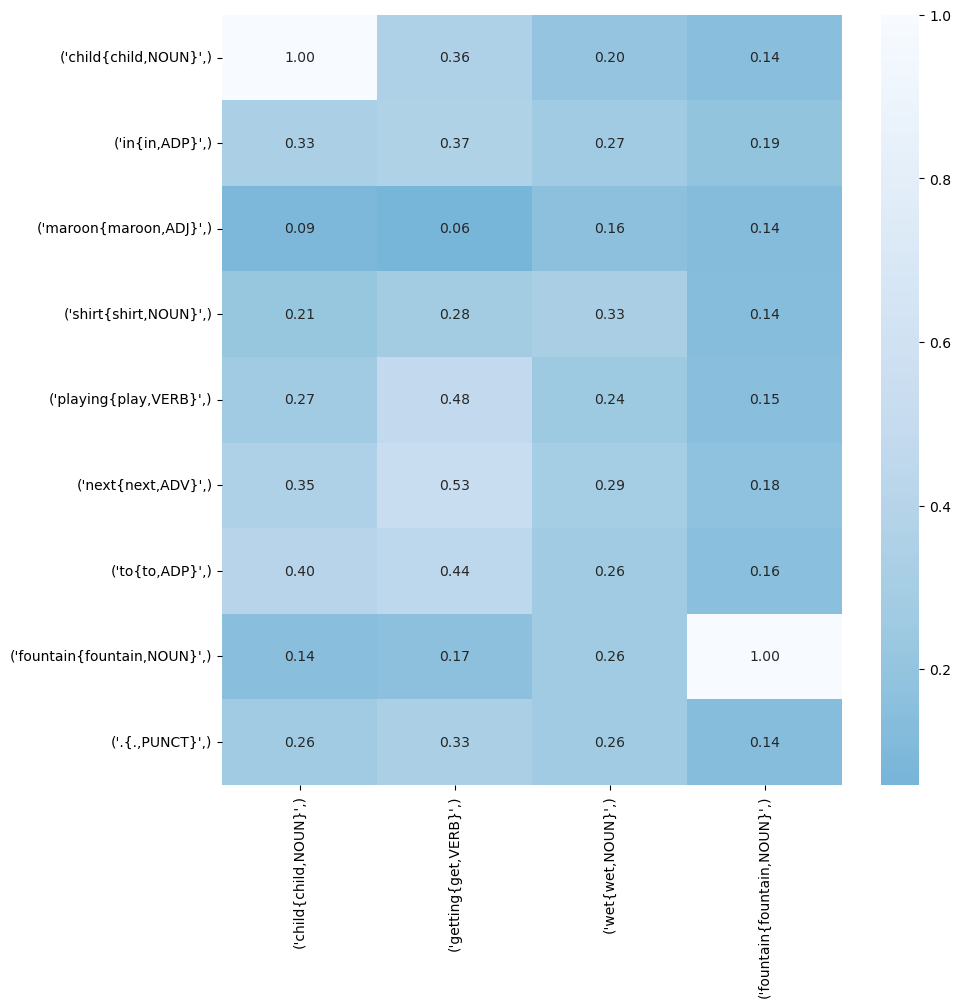

In [64]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(ma, center=0, cmap='Blues_r', annot=True, fmt='.2f')

In [65]:
ma.max().sum()

2.8590837

In [66]:
ma.index

Index([      ('child{child,NOUN}',),              ('in{in,ADP}',),
            ('maroon{maroon,ADJ}',),       ('shirt{shirt,NOUN}',),
            ('playing{play,VERB}',),          ('next{next,ADV}',),
                    ('to{to,ADP}',), ('fountain{fountain,NOUN}',),
                    ('.{.,PUNCT}',)],
      dtype='object')

# Checar cuant suma la información por clase

In [67]:
prueba=pd.read_csv("data/prueba.csv")

In [68]:
prueba

,Unnamed: 0,Unnamed: 0.1,gold_label,sentence1,sentence2,SET
0,568111,558275,entailment,"A man wearing a blue shirt, black apron, eyegl...",A person in appropriate institution protection...,TEST
1,568812,558976,entailment,A man dressed in a red shirt and black tie sta...,a guy in a red top and tie makes a speech,TEST
2,560781,550939,contradiction,A young boy runs across a road in front of a s...,A boy sleeps in his bed.,TEST
3,565799,555963,contradiction,An Asian woman is standing on a path with a ba...,Nobody is standing,TEST
4,562665,552829,neutral,A child in a maroon shirt playing next to a fo...,The child is getting wet from the fountain.,TEST
...,...,...,...,...,...,...
95,567068,557232,entailment,"A group of men in blue shirts, banded hats, an...",a bunch of guys in colorful clothes stand toge...,TEST
96,568650,558814,entailment,A woman holding a newborn baby.,woman holds baby,TEST
97,559485,549643,contradiction,A skateboarding youth does a trick on a rail.,A man painting a tree.,TEST
98,559755,549913,contradiction,Four children are playing in some water.,The children are doing chores.,TEST


In [69]:
def entropia(X):
    """Devuelve el valor de entropia de una muestra de datos""" 
    probs = [np.mean(X == valor) for valor in set(X)]
    return -round(sum(p * np.log2(p) for p in probs), 3)

In [70]:
import time


In [71]:
sumas=[]
distancias=[]
entropias=[]
etiquetas=[]
mearts=[]
mutinf=[]
max_info=[]
list_antonimos=[]
listas_malign=[]
lista_anto=[]
lista_related=[]
lista_relatedT=[]
for num, strings in df.iterrows():
    print(num)
    texto_2_t=df.at[num,"Text"]
    hipotesis_2_t=df.at[num,"Hipotesis"]
    texto_2=df.at[num,"R_Text"]
    hipotesis_2=df.at[num,"R_Hip"]
    if len(texto_2_t) > 41 and len(hipotesis_2_t) > 41:
        max_t=41
        max_h=41
    elif len(texto_2_t) > 41:
        max_t=41
        max_h=len(hipotesis_2_t)
    elif len(hipotesis_2_t) > 41:
        max_h=41
        max_t=len(texto_2_t)
    else:
        max_t=len(texto_2_t)
        max_h=len(hipotesis_2_t)
    lista_l=[]
    lista_muinfor=[]    
    for i in range(max_t):
        lista=[]
        lista_mu=[]
        for j in range(max_h):
            #lista.append()
            lista.append(wasserstein_distance(texto_2[i],hipotesis_2[j]))
            lista_mu.append(mi.mutual_information_2d(np.array(texto_2[i]),np.array(hipotesis_2[j])))
        lista_l.append(lista)
        lista_muinfor.append(lista_mu)
    
    meartrh=pd.DataFrame(lista_l[:],index=texto_2_t[:max_t],columns=hipotesis_2_t[:max_h])
    MI_=pd.DataFrame(lista_muinfor[:],index=texto_2_t[:max_t],columns=hipotesis_2_t[:max_h])
    maalign=pd.DataFrame(np.dot(texto_2[:max_t],hipotesis_2[:max_h].T),index=texto_2_t[:max_t],columns=hipotesis_2_t[:max_h])
    col=maalign.columns
    borrar=[]
    indexes=maalign.index
    for c in col:
        if "{null," in str(c) or "{be,VERB" in str(c) or ("NOUN" not in str(c) and "VERB" not in str(c) and "ADJ" not in str(c) and "ADV" not in str(c)):
            borrar.append(c)        
        elif str(c) in indexes:
            borrar.append(c)        
    borrar_i=[]
    for index in indexes:
        if "{null," in str(index) or "{be,VERB" in str(index) or ("NOUN" not in str(index) and "VERB" not in str(index) and "ADJ" not in str(index) and "ADV" not in str(index)):
            borrar_i.append(index) 
        elif str(index) in col:
            borrar_i.append(index) 
    maalign=maalign.drop(borrar,axis=1)
    maalign=maalign.drop(borrar_i,axis=0)
    meartrh=meartrh.drop(borrar,axis=1)
    meartrh=meartrh.drop(borrar_i,axis=0)
    MI_=MI_.drop(borrar,axis=1)
    MI_=MI_.drop(borrar_i,axis=0)
    borrar=[]
    borrar_i=[]
    col=maalign.columns
    for index,strings in maalign.iterrows():
        lema_i=str(index).split("{")[1].split(",")[0]
        for c in col:
            if index==c:
                borrar_i.append(index)
                borrar.append(c)
            if strings[c]>=1:
                borrar_i.append(index)
                borrar.append(c)
            lema_c=str(c).split("{")[1].split(",")[0]
            if lema_i == lema_c:
                borrar_i.append(index)
                borrar.append(c)
    maalign=maalign.drop(borrar,axis=1)
    maalign=maalign.drop(borrar_i,axis=0)
    meartrh=meartrh.drop(borrar,axis=1)
    meartrh=meartrh.drop(borrar_i,axis=0)
    MI_=MI_.drop(borrar,axis=1)
    MI_=MI_.drop(borrar_i,axis=0)
    
    #primera vuelta
    a=maalign.idxmax().values
    b=maalign.columns
    rel=[]
    for i in range(len(a)):
        rel.append((a[i],b[i]))
    a,b=encontrar_relaciones(rel[:])
    maalign=maalign.drop(a,axis=1)
    maalign=maalign.drop(b,axis=0)
    meartrh=meartrh.drop(a,axis=1)
    meartrh=meartrh.drop(b,axis=0)
    MI_=MI_.drop(a,axis=1)
    MI_=MI_.drop(b,axis=0)
    
    # relaciones contrarias
    a=maalign.idxmax().values
    b=maalign.columns
    rel=[]
    for i in range(len(a)):
        rel.append((a[i],b[i]))
    a,b,d=encontrar_relaciones_contrarias(rel[:])
    maalign=maalign.drop(a,axis=1)
    maalign=maalign.drop(b,axis=0)
    meartrh=meartrh.drop(a,axis=1)
    meartrh=meartrh.drop(b,axis=0)
    MI_=MI_.drop(a,axis=1)
    MI_=MI_.drop(b,axis=0)
    
    # #relaciones cercanas
    # a=maalign.idxmax().values
    # b=maalign.columns
    # rel=[]
    # for i in range(len(a)):
    #     rel.append((a[i],b[i]))
    # a,b,r_l1=encontrar_relaciones_cercanas(rel[:])
    # maalign=maalign.drop(a,axis=1)
    # maalign=maalign.drop(b,axis=0)
    # meartrh=meartrh.drop(a,axis=1)
    # meartrh=meartrh.drop(b,axis=0)
    # MI_=MI_.drop(a,axis=1)
    # MI_=MI_.drop(b,axis=0)

    # segunda vuelta
    a=maalign.idxmax().values
    b=maalign.columns
    rel=[]
    for i in range(len(a)):
        rel.append((a[i],b[i]))
    a,b=encontrar_relaciones(rel[:])
    maalign=maalign.drop(a,axis=1)
    maalign=maalign.drop(b,axis=0)
    meartrh=meartrh.drop(a,axis=1)
    meartrh=meartrh.drop(b,axis=0)
    MI_=MI_.drop(a,axis=1)
    MI_=MI_.drop(b,axis=0)
        
    #relaciones contrarias quitar
    a=maalign.idxmax().values
    b=maalign.columns
    rel=[]
    for i in range(len(a)):
        rel.append((a[i],b[i]))
    
    a,b,d1=encontrar_relaciones_contrarias(rel[:])
    maalign=maalign.drop(a,axis=1)
    maalign=maalign.drop(b,axis=0)
    meartrh=meartrh.drop(a,axis=1)
    meartrh=meartrh.drop(b,axis=0)
    MI_=MI_.drop(a,axis=1)
    MI_=MI_.drop(b,axis=0)

    # relaciones cercanas quitar
    indexes=maalign.index
    columnas=maalign.columns
    a,b,r_l2=encontrar_relaciones_cercanas(indexes,columnas)
    maalign=maalign.drop(a,axis=1)
    maalign=maalign.drop(b,axis=0)
    meartrh=meartrh.drop(a,axis=1)
    meartrh=meartrh.drop(b,axis=0)
    MI_=MI_.drop(a,axis=1)
    MI_=MI_.drop(b,axis=0)

    #alamacenado de resultados
    sumas.append(maalign.min().sum())
    max_info.append((maalign.max().sum()/(maalign.shape[1])))
    entropias.append(entropia(maalign.round(2).values.flatten()))
    mearts.append(meartrh.max().sum())
    mutinf.append(MI_.max().sum())
    distancias.append(obtener_distancia(num,dfp)) 
    d2=[]   
    if d==[] and d1==[]:
        d2=[]
    else:
        d2=list(set(d+d1))
    r2=[]   
    if r_l2==[]:
        r2=[]
    else:
        r2=list(set(r_l2))
    list_antonimos.append(len(d2))
    listas_malign.append(maalign)
    lista_anto.append(d2)
    lista_related.append(len(r2))
    lista_relatedT.append(r2)

0


man  is_a  person
food  related_to  meal
1
guy  is_a  man
dress  related_to  top
2
3
4
5
6
7
8
snow  is_a  weather
play  related_to  enjoy
9


/tmp/ipykernel_101847/2476662664.py:173: RuntimeWarning: invalid value encountered in double_scalars
  max_info.append((maalign.max().sum()/(maalign.shape[1])))


10
11
lawn  is_a  grass
father  related_to  man
12
man  antonym  people
man  antonym  people
man  related_to  people
13
14
girl  is_a  child
15
16
17
water  related_to  lake
18
lady  is_a  woman
dog  antonym  cat
dog  antonym  cat
dog  related_to  cat
19
boy  is_a  child
20
21
22
23
24
25
shadow  antonym  light
shadow  antonym  light
shadow  related_to  light
26
ball  related_to  play
ball  related_to  game
27
28
man  antonym  people
man  antonym  people
man  related_to  people
book  related_to  reading
book  related_to  material
29
30
guy  is_a  man
31
child  antonym  adult
child  antonym  adult
child  related_to  adult
32
woman  is_a  man
33
celebrate  related_to  celebration
34
man  related_to  people
35
dress  related_to  girl
young  related_to  new
36
37
father  is_a  man
son  is_a  child
38
39
cellphone  is_a  phone
40
41
42
43
44
shirtless  related_to  shirt
tie  related_to  wear
45
drawing  is_a  art
46
47
48
middle  distinct from  back
middle  distinct from  back
wave  related

In [72]:
meartrh

,"actually{actually,ADV}","sasquatch{sasquatch,NOUN}"
"dressed{dress,VERB}",0.005627,0.009660
"suits{suit,NOUN}",0.009887,0.005550
"ties{tie,NOUN}",0.008758,0.006563
"clasps{clasp,VERB}",0.011448,0.005406
"their{-PRON-,ADJ}",0.004394,0.013741
"raised{raise,VERB}",0.008580,0.009331
"hands{hand,NOUN}",0.005058,0.011088
"standing{stand,VERB}",0.005231,0.009481
"front{front,NOUN}",0.009058,0.006825
"corporate{corporate,ADJ}",0.008859,0.009759


In [73]:
maalign

,"actually{actually,ADV}","sasquatch{sasquatch,NOUN}"
"dressed{dress,VERB}",0.389713,0.088503
"suits{suit,NOUN}",0.344928,0.052184
"ties{tie,NOUN}",0.277400,0.010205
"clasps{clasp,VERB}",0.016735,-0.006220
"their{-PRON-,ADJ}",0.464549,-0.038553
"raised{raise,VERB}",0.409186,-0.010537
"hands{hand,NOUN}",0.435277,-0.019895
"standing{stand,VERB}",0.433906,0.029716
"front{front,NOUN}",0.355166,-0.004828
"corporate{corporate,ADJ}",0.266992,-0.026747


In [74]:
#listas_malign

In [75]:
clases=prueba["gold_label"].values
temp =np.array([listas_malign,lista_anto,clases])
temp = pd.DataFrame(temp.T,columns=["malign","antonimos","CLASS"])
temp.to_pickle("salida/data6F.pickle")

/tmp/ipykernel_101847/2827467062.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  temp =np.array([listas_malign,lista_anto,clases])


# Revision de matriz de alineamiento

In [76]:
ch=5
temp.at[ch,"antonimos"]

[]

In [77]:
temp.at[ch,"malign"].max().sum()/temp.at[ch,"malign"].shape[1]

0.3501353859901428

In [78]:
clases=prueba["gold_label"].values
temp1 =np.array([sumas,distancias,entropias,mutinf,mearts,max_info,list_antonimos,lista_related,clases])
df_sumas = pd.DataFrame(temp1.T,columns=["suma","distancias","entropias","mutual_info","m_earth","max_info_p","antonimos","relaciones","CLASS"])
df_sumas

,suma,distancias,entropias,mutual_info,m_earth,max_info_p,antonimos,relaciones,CLASS
0,0.382265,39.1457,4.734,6.08962,0.0466113,0.41685,0,1,entailment
1,0.164411,13.8636,2.585,0.984762,0.00726423,0.423473,0,1,entailment
2,0.145214,21.4414,4.357,2.79723,0.0270921,0.37404,0,0,contradiction
3,0.184051,5.69077,3.278,0.727185,0.0107302,0.428242,0,0,contradiction
4,0.217909,12.3205,3,1.73103,0.0168398,0.429542,0,0,neutral
...,...,...,...,...,...,...,...,...,...
95,0.449939,29.3011,4.453,4.58278,0.0330261,0.525259,0,1,entailment
96,0,4.41478,0,0,0,NaN,0,0,entailment
97,0.473885,20.7085,3.457,3.06281,0.0277288,0.335611,0,1,contradiction
98,0.484735,14.1758,2,1.88912,0.0164436,0.372569,0,1,contradiction


In [79]:
df_sumas.at[3,"distancias"]

5.690769672393799

In [80]:
#df_sumas.to_csv("salida/prueba_medidas.csv",index=False)
df_sumas.to_csv("salida/prueba_medidas6validar.csv",index=False)

<AxesSubplot:title={'center':'antonimos'}, xlabel='CLASS'>

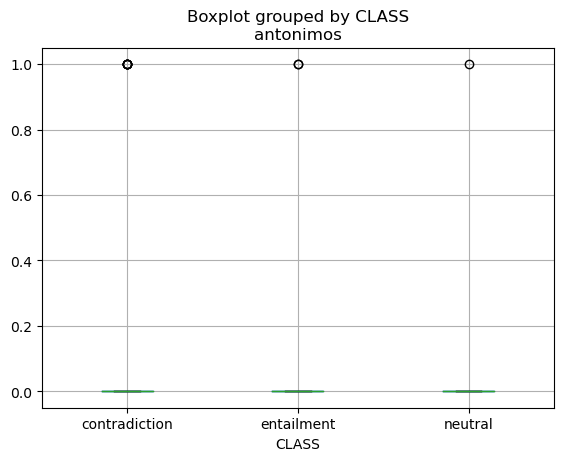

In [81]:
df_sumas.boxplot(by="CLASS",column=["antonimos"])

<AxesSubplot:title={'center':'relaciones'}, xlabel='CLASS'>

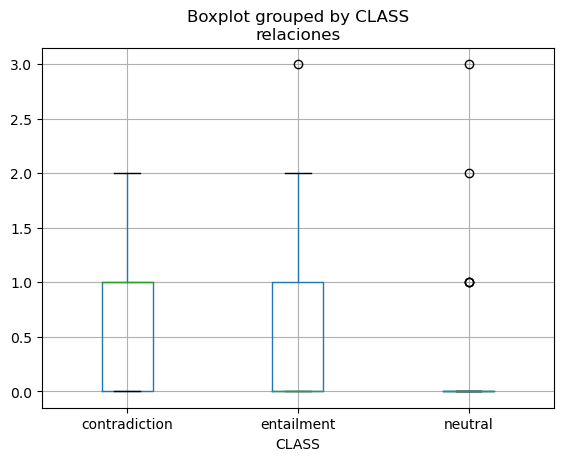

In [82]:
df_sumas.boxplot(by="CLASS",column=["relaciones"])

<AxesSubplot:title={'center':'distancias'}, xlabel='CLASS'>

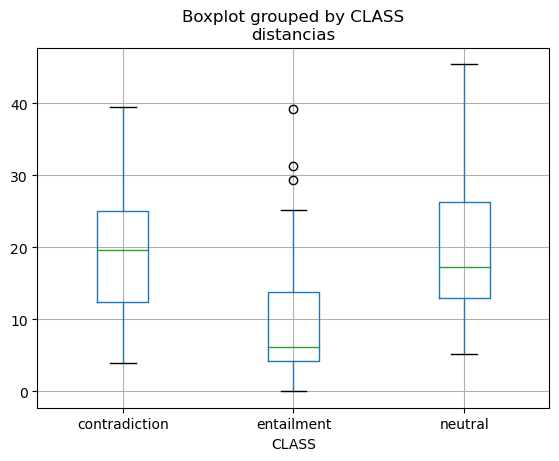

In [83]:
df_sumas.boxplot(by="CLASS",column=["distancias"])

<AxesSubplot:title={'center':'mutual_info'}, xlabel='CLASS'>

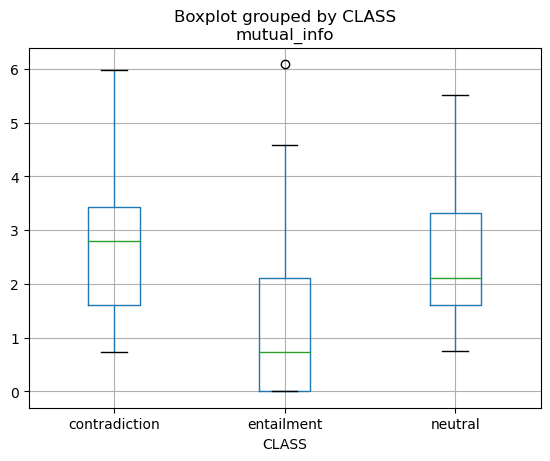

In [84]:
df_sumas.boxplot(by="CLASS",column=["mutual_info"])

<AxesSubplot:title={'center':'suma'}, xlabel='CLASS'>

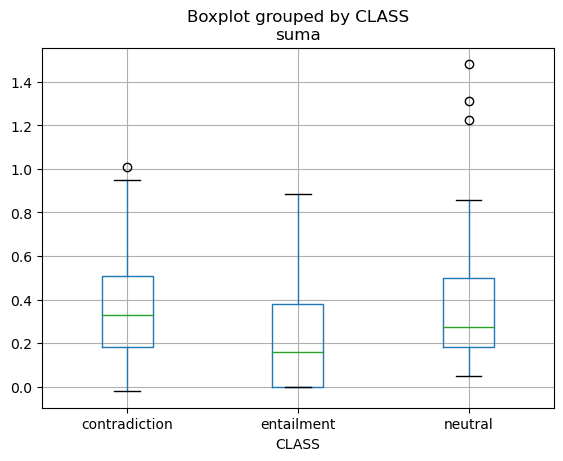

In [85]:
df_sumas.boxplot(by="CLASS",column=["suma"])

<AxesSubplot:title={'center':'entropias'}, xlabel='CLASS'>

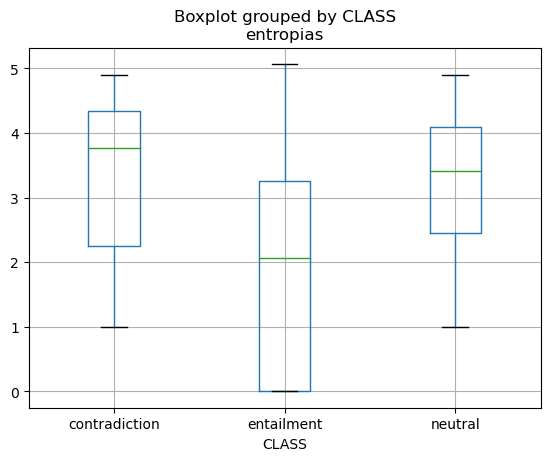

In [86]:
df_sumas.boxplot(by="CLASS",column=["entropias"])

<AxesSubplot:title={'center':'max_info_p'}, xlabel='CLASS'>

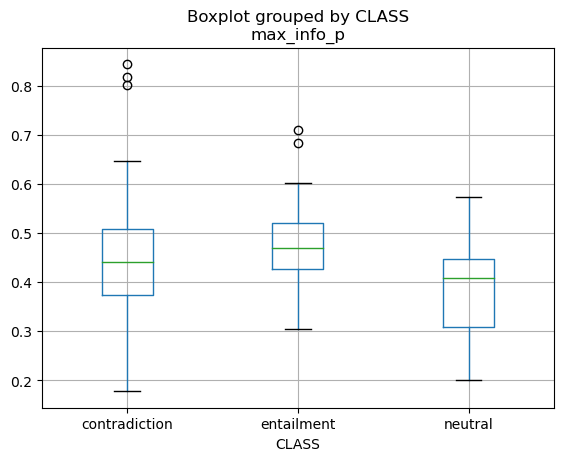

In [87]:
df_sumas.boxplot(by="CLASS",column=["max_info_p"])